In [0]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/train.csv')

In [0]:
df
import warnings
warnings.filterwarnings("ignore")

In [0]:
df2=pd.read_csv('/content/drive/My Drive/game_overview.csv')

In [0]:
df3=pd.read_csv('/content/drive/My Drive/test.csv')

In [0]:
df['title'].unique()

array(["Spooky's Jump Scare Mansion", 'Sakura Clicker', 'WARMODE',
       'Fractured Space', 'Dota 2', 'Path of Exile', 'War Thunder',
       'Ring of Elysium', 'Team Fortress 2', 'Yu-Gi-Oh! Duel Links',
       'SMITE®', 'Brawlhalla', 'World of Tanks Blitz',
       'DCS World Steam Edition', 'Heroes & Generals',
       'The Elder Scrolls®: Legends™', 'Trove', 'Neverwinter',
       'Realm Royale', 'PlanetSide 2', 'Realm of the Mad God', 'Elsword',
       'theHunter Classic', 'Eternal Card Game', 'Black Squad',
       'Freestyle 2: Street Basketball', 'Bless Online',
       'RaceRoom Racing Experience', 'Fallout Shelter',
       'Tactical Monsters Rumble Arena', 'Creativerse', 'Dreadnought',
       'Infestation: The New Z', 'Shop Heroes', 'Robocraft',
       'Business Tour - Board Game with Online Multiplayer',
       'Crusaders of the Lost Idols', 'AdventureQuest 3D',
       'Realm Grinder', 'World of Guns: Gun Disassembly',
       'Bloons TD Battles', 'Cuisine Royale', 'School of Drago

In [0]:
df3['title'].unique()

array(['Counter-Strike: Global Offensive', 'World of Warships',
       'Star Trek Online', 'Paladins®', 'Shadowverse CCG',
       'Tree of Savior (English Ver.)', 'VEGA Conflict', 'Minion Masters',
       'The Lord of the Rings Online™', 'Fishing Planet', 'Crush Crush',
       'Dungeon Defenders II', 'Governor of Poker 3',
       'Digimon Masters Online', 'Shakes and Fidget', 'Champions Online',
       'Magic Duels', 'Aura Kingdom', 'H1Z1', 'GUNS UP!'], dtype=object)

In [0]:
df2['title'].unique()

array(["Spooky's Jump Scare Mansion", 'Sakura Clicker', 'WARMODE',
       'Fractured Space', 'Counter-Strike: Global Offensive', 'Dota 2',
       'Path of Exile', 'War Thunder', 'Ring of Elysium',
       'Team Fortress 2', 'World of Warships', 'Star Trek Online',
       'Yu-Gi-Oh! Duel Links', 'Paladins®', 'SMITE®', 'Brawlhalla',
       'World of Tanks Blitz', 'Shadowverse CCG',
       'DCS World Steam Edition', 'Heroes & Generals',
       'The Elder Scrolls®: Legends™', 'Tree of Savior (English Ver.)',
       'Trove', 'Neverwinter', 'Realm Royale', 'PlanetSide 2',
       'VEGA Conflict', 'Minion Masters', 'Realm of the Mad God',
       'Elsword', 'The Lord of the Rings Online™', 'Fishing Planet',
       'Crush Crush', 'Dungeon Defenders II', 'theHunter Classic',
       'Governor of Poker 3', 'Eternal Card Game', 'Black Squad',
       'Freestyle 2: Street Basketball', 'Bless Online',
       'RaceRoom Racing Experience', 'Digimon Masters Online',
       'Fallout Shelter', 'Shakes and Fi

In [0]:
for i in df3.title.unique():
    if i not in df.title.unique():
        print(i)

Counter-Strike: Global Offensive
World of Warships
Star Trek Online
Paladins®
Shadowverse CCG
Tree of Savior (English Ver.)
VEGA Conflict
Minion Masters
The Lord of the Rings Online™
Fishing Planet
Crush Crush
Dungeon Defenders II
Governor of Poker 3
Digimon Masters Online
Shakes and Fidget
Champions Online
Magic Duels
Aura Kingdom
H1Z1
GUNS UP!


In [0]:
for i in df3.title.unique():
    if i not in df2.title.unique():
        print(i)

In [0]:
data_frame = pd.merge(df, df2, on='title')

In [0]:
y_train=df['user_suggestion']
data_frame.drop(['user_suggestion'],axis=1,inplace=True)

In [0]:
x_test = pd.merge(df3, df2, on='title')

In [0]:
data=pd.concat([x_test,data_frame],axis=0)

In [0]:
import nltk
data_frame.tags=data_frame.tags.astype(str).astype(str)
c=-1
from tqdm import tqdm
for i in tqdm(data.tags):
    c+=1
    data.tags[c]=str(i)[1:-1] 

100%|██████████| 25539/25539 [00:24<00:00, 1055.77it/s]


In [0]:

data.year=pd.to_numeric(data.year, downcast ='signed') 

In [0]:
data.year.fillna(method='ffill',inplace=True)
data.isnull().sum()

review_id      0
title          0
year           0
user_review    0
developer      0
publisher      0
tags           0
overview       0
dtype: int64

In [0]:
#!pip install pyspellchecker
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=tuple(nltk.corpus.stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
le=WordNetLemmatizer()
lemmatized=[]
#from spellchecker import SpellChecker
#spell=SpellChecker()
tokenizer=nltk.RegexpTokenizer(r'\w+')
from tqdm import tqdm_notebook
for i in tqdm_notebook(data.user_review):
    word=tokenizer.tokenize(i)
    stop=[le.lemmatize(x) for x in tuple([x.lower() for x in tuple(word)]) if x not in tuple(stop_words)]
    #stop=[spell.correction(i) for i in tuple(stop)]
    new=" ".join(stop)
    lemmatized.append(new)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


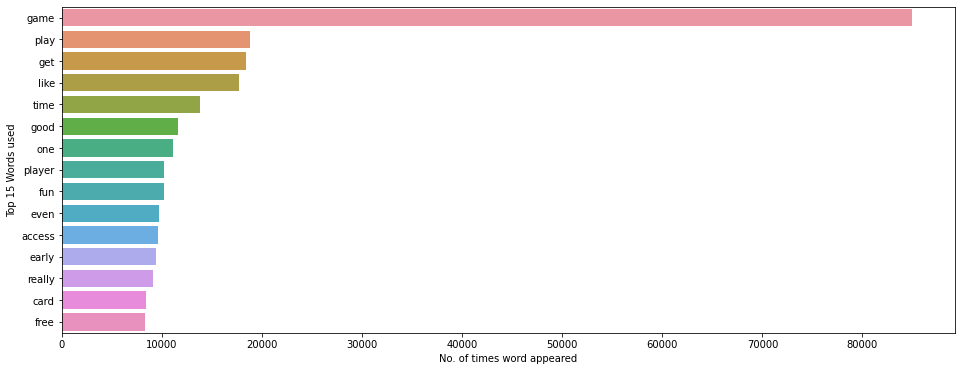

In [0]:
l=[]
for i in tqdm_notebook(lemmatized):
  all_words=nltk.word_tokenize(i)
  for k in all_words:
    l.append(k)
freq=nltk.FreqDist(l)
a=freq.most_common(15)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
num=[]
word=[]
for i in a:
  num.append(i[0])
  word.append(i[1])
plt.figure(figsize=(16, 6))
ax=sns.barplot(x=word,y=num)
ax.set(xlabel='No. of times word appeared',ylabel='Top 15 Words used')

plt.show()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vectorizer=TfidfVectorizer(use_idf=True,max_features=1000)
fitted=tfidf_vectorizer.fit(data.user_review)
vector_x=fitted.transform(data.user_review).toarray()
vector_x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0387908 , 0.04723488, ..., 0.01993093, 0.        ,
        0.0994098 ],
       ...,
       [0.04484619, 0.        , 0.        , ..., 0.        , 0.06593087,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.13252677, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
vec_x=pd.DataFrame(vector_x)

In [0]:
data.reset_index(drop=True, inplace=True)
vec_x.reset_index(drop=True, inplace=True)
data2=pd.concat([data,vec_x],axis=1)

In [0]:
dummy=data2['tags'].str.get_dummies(',')

In [0]:
data2=pd.concat([data2,dummy],axis=1)

In [0]:
dummy=data2['developer'].str.get_dummies(',')

In [0]:
data2=pd.concat([data2,dummy],axis=1)

In [0]:
data2.year.nunique()

In [0]:
dummy=pd.get_dummies(data2['year'])
data_last=pd.concat([data2,dummy],axis=1)
data_last.shape

(25539, 1238)

In [0]:
dummy=pd.get_dummies(data2['title'])
data_last=pd.concat([data2,dummy],axis=1)
data_last.shape

(25539, 1294)

In [0]:
data_last2=data_last.drop(['review_id','title','year','user_review','developer','publisher','tags'],axis=1)

In [0]:
data_last2.shape

(25539, 1287)

In [0]:
#This have to be done afterwards.
from sklearn.preprocessing import LabelEncoder
import numpy as np
labelencoder = LabelEncoder()
x=data_last2['overview']
x = labelencoder.fit_transform(x)
x


array([13, 13, 13, ..., 24, 24, 24])

In [0]:
x=pd.get_dummies(data_last2['overview'],drop_first=True)

In [0]:
#x=pd.Series(x,name='overview')
data_last3=data_last2.drop(['overview'],axis=1)
data_last3=pd.concat([data_last3,x],axis=1)
data_last3.shape

(25539, 1347)

In [0]:
df=data_last3

In [0]:
data_last3.shape

(25539, 1347)

In [0]:
from sklearn.preprocessing import MinMaxScaler
data_last3.iloc[:,:]=MinMaxScaler().fit_transform(data_last3.iloc[:,:].values)

In [0]:
test=data_last3.iloc[0:8045,:]

In [0]:
train=data_last3.drop(data_last3.index[0:8045],axis=0)

In [0]:
train.reset_index(drop=True, inplace=True)

In [0]:
# import statsmodels.api as sm
# c=0
# cols = list(train.columns)
# pmax = 1
# while (len(cols)>0):
#     c+=1
#     print(c)
#     p= []
#     X_1 = train[cols]
#     X_1 = sm.add_constant(X_1)
#     model = sm.OLS(y_train,X_1).fit()
#     #print(model.summary())
#     p = pd.Series(model.pvalues.values[1:],index = cols)      
#     pmax = max(p)
#     feature_with_p_max = p.idxmax()
#     if(pmax>0.06):
#         cols.remove(feature_with_p_max)
#     else:
#         break
# selected_features_BE = cols
# print(selected_features_BE)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, y_train, test_size=0.2, random_state=42)


In [0]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print('Naive_Bayes:',accuracy_score(y_test,y_pred))

Naive_Bayes: 0.8042297799371249


In [0]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(100, activation='relu', input_shape=[1347]),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(100, activation='relu'), 
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(100, activation='relu'),                                  
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')                                  

])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               134800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [0]:
x_train.shape

(13995, 1347)

In [0]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=10, epochs=100)

Epoch 1/100
1400/1400 [==============================] - 4s 3ms/step - loss: 0.4854 - accuracy: 0.7665 - val_loss: 0.3604 - val_accuracy: 0.8388
Epoch 2/100
1400/1400 [==============================] - 4s 3ms/step - loss: 0.3712 - accuracy: 0.8391 - val_loss: 0.3172 - val_accuracy: 0.8605
Epoch 3/100
1400/1400 [==============================] - 3s 2ms/step - loss: 0.3406 - accuracy: 0.8559 - val_loss: 0.3101 - val_accuracy: 0.8591
Epoch 4/100
1400/1400 [==============================] - 4s 3ms/step - loss: 0.3156 - accuracy: 0.8656 - val_loss: 0.3139 - val_accuracy: 0.8657
Epoch 5/100
1400/1400 [==============================] - 4s 3ms/step - loss: 0.2984 - accuracy: 0.8747 - val_loss: 0.3174 - val_accuracy: 0.8622
Epoch 6/100
1400/1400 [==============================] - 4s 3ms/step - loss: 0.2836 - accuracy: 0.8819 - val_loss: 0.3132 - val_accuracy: 0.8722
Epoch 7/100
1400/1400 [==============================] - 4s 3ms/step - loss: 0.2740 - accuracy: 0.8857 - val_loss: 0.3115 - val_ac

In [0]:
x_test.shape

(3499, 1347)

In [0]:
predicted=model.predict(x_test)
c=0
for i in predicted:
  if i<0.5:
    predicted[c]=0
  else:
    predicted[c]=1
  c+=1
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test,predicted))

In [0]:
df3=pd.read_csv('/content/drive/My Drive/test.csv')
review_id=df3.review_id
predicted=model.predict(test)
c=0
for i in predicted:
  if i<0.5:
    predicted[c]=0
  else:
    predicted[c]=1
  c+=1

In [0]:
predicted=predicted.tolist()

In [0]:
c=-1
from tqdm import tqdm
for i in tqdm(predicted):
    c+=1
    predicted[c]=str(i)[1:-1] 

In [0]:
result=pd.DataFrame({'review_id':review_id,'user_suggestion':predicted})

In [0]:
result.user_suggestion=pd.to_numeric(result.user_suggestion)

In [0]:
result.user_suggestion=result.user_suggestion.astype(int)

In [0]:
result.to_csv('result.csv',index=False)